In [157]:
import numpy as np
import sklearn

In [158]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [159]:
len(X), len(y)

(1000, 1000)

In [160]:
print(f'first 5 samples of X: {X[:5]}')
print(f'first 5 samples of y: {y[:5]}')

first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [161]:
import pandas as pd

circles = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'label': y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [196]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

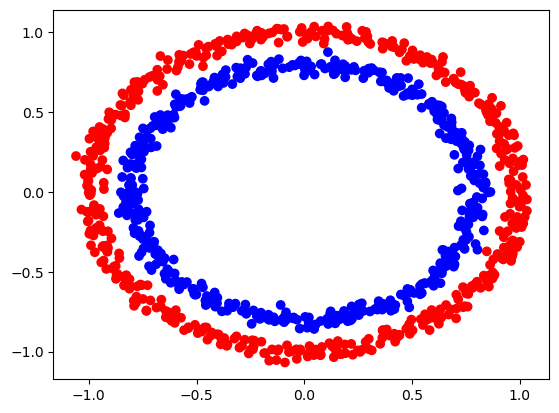

In [203]:
import matplotlib.pyplot as plt

colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(x=X[:, 0], y=X[:, 1], c=colors)
plt.show()

## Check input and output shape

In [163]:
X.shape, y.shape

((1000, 2), (1000,))

In [164]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [165]:
X_sample = X[0]
y_sample = y[0]

print(f'first 5 samples of X_sample: {X_sample}')
print(f'first 5 samples of y_sample: {y_sample}')

first 5 samples of X_sample: [0.75424625 0.23148074]
first 5 samples of y_sample: 1


## Turn data into tensors and split

In [166]:
import torch

torch.__version__

'2.6.0'

In [167]:
type(X)

numpy.ndarray

In [168]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [169]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [170]:
torch.manual_seed(42)

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [173]:
n_samples

1000

## Building model

In [174]:
from torch import nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [175]:
X_train.shape

torch.Size([800, 2])

In [176]:
y_train[0]

tensor(1.)

In [177]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1),
        )

    def forward(self, x):
        return self.two_linear_layers(x)

model_0 = CircleModelV0().to(device)

model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [178]:
device

device(type='cuda')

In [179]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [180]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [181]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]], device='cuda:0')),
             ('1.bias', tensor([0.1379], device='cuda:0'))])

### Prediction

In [182]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'First 10 samples of untrained predictions: {untrained_preds[:10]}')
print(f'First 10 labels of untrained predictions: {y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 samples of untrained predictions: tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760],
        [0.4158],
        [0.3764],
        [0.4404],
        [0.0688],
        [0.1532]], device='cuda:0')
First 10 labels of untrained predictions: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [183]:
y_test[:10],

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),)

In [184]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)


In [185]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_pred, y_true).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

## Train model

In [186]:
model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]


y_logits

tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760]], device='cuda:0')

In [187]:
type(X_test)

torch.Tensor

In [188]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5191],
        [0.5363],
        [0.5203],
        [0.5185],
        [0.5929]], device='cuda:0')

In [189]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [190]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## Building a training and testing loop

In [191]:
device

device(type='cuda')

In [192]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # loss = loss_fn(torch.sigmoid(y_logits), y_train)
    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')



Epoch: 0 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 10 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 20 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 30 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 40 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 50 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 60 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 70 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 80 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%
Epoch: 90 | Loss: 0.70234, Acc: 57.38% | Test loss: 0.70263, Test acc: 56.50%


BCEWithLogitsLoss()

BCELoss()